In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from nsdmd import utils
from nsdmd import nsdmd

In [2]:
sr = 1000
f1 = 17
t1 = np.arange(2000)
f2 = 30
t2 = np.arange(2000)

coupling = np.ones(len(t1))
for i in range(0,len(coupling),200):
    coupling[i:i+100] = 0
net1, F1_true, _ = utils.make_network(f1, len(t1), \
                   np.hstack([i*np.ones(50) for i in [1,2]]), \
                   np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-30,30,10)]]),\
                   sr,
                   coupling)
net2, F2_true, _ = utils.make_network(f2, len(t2), \
                   np.hstack([i*np.ones(50) for i in [2,1]]), \
                   np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-10,50,10)]]),
                   sr)
x = np.zeros((100,2000))
x[:,t1] += net1
x[:,t2] += net2
x = utils.add_noise(x, std=0.1)
t = np.arange(x.shape[1]) / sr

Text(0, 0.5, 'Channel')

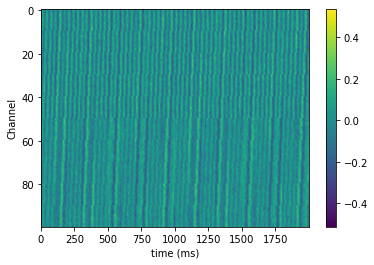

In [3]:
plt.imshow(x, aspect='auto')
plt.colorbar()
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0, 0.5, 'f(t)')

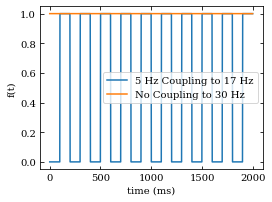

In [4]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)

ax.plot(np.mean(F1_true, axis=0), label='5 Hz Coupling to '+str(f1)+' Hz')
ax.plot(np.mean(F2_true, axis=0), label='No Coupling to '+str(f2)+' Hz')
ax.legend()
ax.set_xlabel('time (ms)')
ax.set_ylabel('f(t)')
# plt.savefig('figs/coupling_square.svg', bbox_inches='tight')

In [ ]:
model = nsdmd.NSDMD(opt_rank=4, sim_thresh_phi_amp=0.98, grad_N=8, sim_thresh_phi_phase=1)
model.fit_opt(x, t, sr)

In [ ]:
model.fit_reduction(x, len(t), sr)

Text(0, 0.5, 'Cosine Distance')

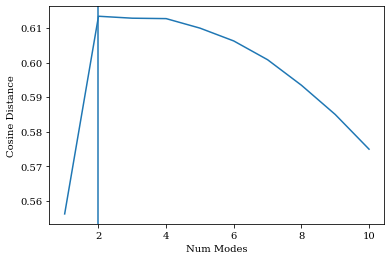

In [ ]:
plt.plot(model.num_modes_, model.errors_)
plt.axvline(2)
plt.xlabel('Num Modes')
plt.ylabel('Cosine Distance')

In [8]:
model.fit_f(x, len(t), sr, 2)

/tmp/ipykernel_1451/2092082735.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + alpha)


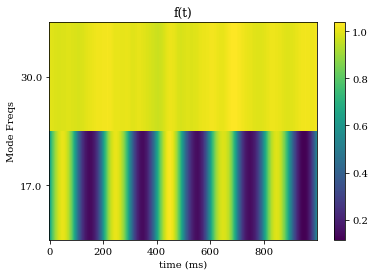

In [9]:
alpha = [str(np.round(f,2)) for f in model.freq_mean_]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(model.f_hat_[:,500:-500], aspect='auto')
fig.colorbar(cax)
ax.set_yticklabels([''] + alpha)
ax.xaxis.set_ticks_position('bottom')
plt.title('f(t)')
plt.xlabel('time (ms)')
plt.ylabel('Mode Freqs')
plt.show()

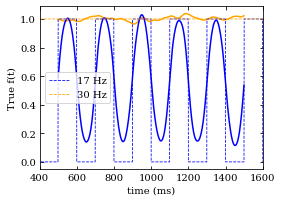

In [11]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)

colors = ['orange', 'blue', 'blue', 'green', 'blue', 'green']
for i,f in enumerate(model.f_hat_[:,500:-500]):
    ax.plot(np.arange(500,1500), f, color=colors[i])

ax.plot(t1, np.mean(F1_true, axis=0), color=colors[1], label=str(f1)+' Hz', linestyle='dashed', linewidth=0.8)
ax.plot(t2, np.mean(F2_true, axis=0), color=colors[0], label=str(f2)+' Hz', linestyle='dashed', linewidth=0.8)
ax.legend()
ax.set_xlim(400,1600)
ax.set_xlabel('time (ms)')
ax.set_ylabel('True f(t)')
# plt.savefig('figs/coupling_f.svg', bbox_inches='tight')

In [11]:
x_rec = model.transform(x, len(t), sr)

Text(0, 0.5, 'Channel')

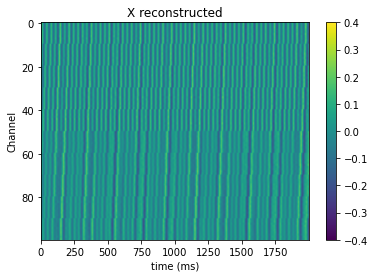

In [12]:
plt.imshow(x_rec, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X reconstructed')
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0, 0.5, 'Channel')

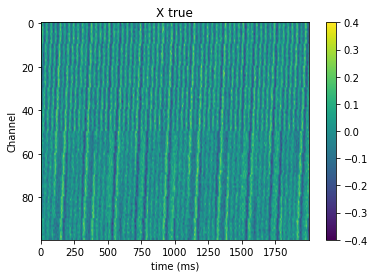

In [13]:
plt.imshow(x, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X true')
plt.xlabel('time (ms)')
plt.ylabel('Channel')